In [3]:
#import modules
import sklearn as sk
import numpy as np
import tensorflow as tf
import matplotlib as plt
import pandas as pd

# REGRESSION

In [10]:
# import regression data set
winedata=pd.read_csv('winequality-red.csv', index_col=False)


In [ ]:
# clean data

In [ ]:
# logistic regression

In [ ]:
# support vector machines

In [ ]:
# decision trees and multi-layer

In [ ]:
# perceptron neural network.

In [ ]:
# evaluation

# CLASSIFICATION

In [4]:
# import classifcation data set
df=pd.read_csv('adult.csv', index_col=False)

Age                  AxesSubplot(0.125,0.798085;0.168478x0.0819149)
Fnlwgt            AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
Education-num     AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
Capital-gain      AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
Capital-loss         AxesSubplot(0.125,0.699787;0.168478x0.0819149)
Hours-per-week    AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
dtype: object

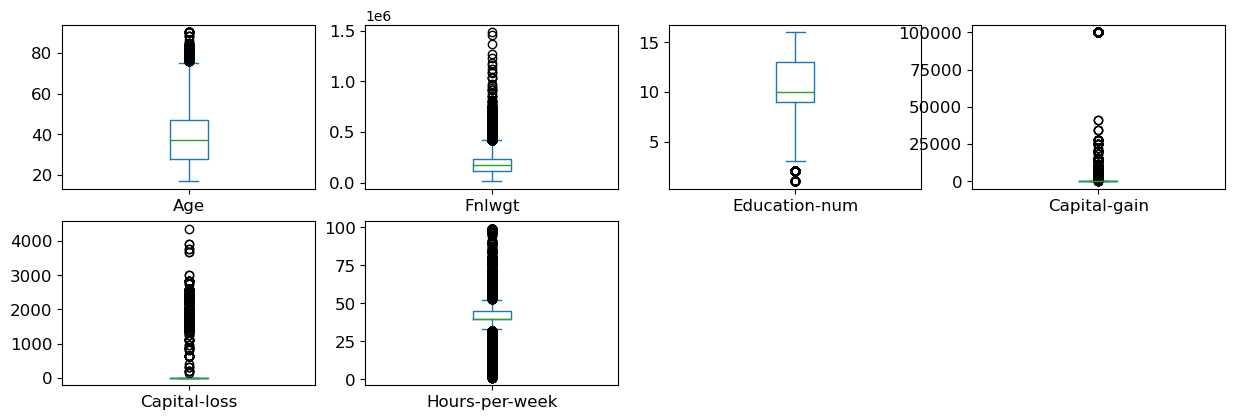

In [15]:
# clean data
df = df[df.Occupation.notnull()]
df.head(125)
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [ ]:
# logistic regression

In [ ]:
# support vector machines

In [ ]:
# decision trees and multi-layer

In [ ]:
# perceptron neural network.

In [ ]:
# evaluation